In [4]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import stan
import arviz as az

import nest_asyncio
nest_asyncio.apply()

In [ ]:
program_code = """
data {
    int<lower=1> N; // Number of trials
    int<lower=1> K; // Number of categories
    array[K] int<lower=0, upper=N> freqs; // Observed frequencies
}

parameters {
    real<lower = 0, upper=1> d;
    real<lower = 0, upper=1> g;
}

transformed parameters {
    simplex[K] theta; // Probability vector for the multinomial distribution
    theta[1] = 0.5 * (d + (1 - d) * g); // Old, Old
    theta[2] = 0.5 * g; // Old, New
    theta[3] = 0.5 * (1 - g); // New, New
    theta[4] = 0.5 * (1 - d) * (1 - g); // New, Old
}

model {
    theta ~ dirichlet(rep_vector(1.0, K)); // Non-informative Dirichlet prior
    freqs ~ multinomial(theta); // Likelihood function
}

generated quantities {
    array[K] int preds = multinomial_rng(theta, N); // Simulated predictions
}

"""

In [6]:
y = [3,7,2,5]

stan_dict = {
    'freqs': y,
    'N': 25,
    'K': 4
}

# Compile model
posterior = stan.build(program_code, data=stan_dict, random_seed=42)


# Sample (i.e., inverse inference)
fit = posterior.sample(num_chains=4, num_samples=2500, num_warmup=1000)

Building...

In file included from /home/ethan/anaconda3/envs/cognitive/lib/python3.12/site-packages/httpstan/include/stan/math/prim/prob/std_normal_ccdf_log.hpp:5,
                 from /home/ethan/anaconda3/envs/cognitive/lib/python3.12/site-packages/httpstan/include/stan/math/prim/prob.hpp:331,
                 from /home/ethan/anaconda3/envs/cognitive/lib/python3.12/site-packages/httpstan/include/stan/math/prim.hpp:16,
                 from /home/ethan/anaconda3/envs/cognitive/lib/python3.12/site-packages/httpstan/include/stan/math/rev.hpp:16,
                 from /home/ethan/anaconda3/envs/cognitive/lib/python3.12/site-packages/httpstan/include/stan/math.hpp:19,
                 from /home/ethan/anaconda3/envs/cognitive/lib/python3.12/site-packages/httpstan/include/stan/model/model_header.hpp:4,
                 from /home/ethan/.cache/httpstan/4.13.0/models/24i24wme/model_24i24wme.cpp:2:
/home/ethan/anaconda3/envs/cognitive/lib/python3.12/site-packages/httpstan/include/stan/math/prim/prob/st


Building: 17.0s, done.Messages from stanc:
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
Sampling:   0%
Sampling:  25% (3500/14000)
Sampling:  50% (7000/14000)
Sampling:  75% (10500/14000)
Sampling: 100% (14000/14000)
Sampling: 100% (14000/14000), done.
Messages received during sampling:
  Gradient evaluation took 2.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.23 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.15 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.16 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.1e-05 secon

In [7]:
# Estimation summary, convergence, and efficiency diagnostics
az.summary(fit)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
d,0.183,0.145,0.000,0.453,0.002,0.001,5101.0,3214.0,1.0
g,0.559,0.116,0.344,0.774,0.001,0.001,6539.0,5533.0,1.0
theta[0],0.321,0.055,0.222,0.421,0.001,0.000,7549.0,6114.0,1.0
theta[1],0.280,0.058,0.172,0.387,0.001,0.001,6539.0,5533.0,1.0
theta[2],0.220,0.058,0.113,0.328,0.001,0.001,6539.0,5533.0,1.0
theta[3],0.179,0.055,0.079,0.278,0.001,0.000,7549.0,6114.0,1.0
preds[0],7.993,2.677,2.000,12.000,0.028,0.020,9235.0,9284.0,1.0
preds[1],7.001,2.644,1.000,11.000,0.029,0.021,8290.0,8804.0,1.0
preds[2],5.542,2.517,1.000,10.000,0.028,0.020,8113.0,8586.0,1.0
preds[3],4.464,2.333,0.000,8.000,0.024,0.017,9629.0,9583.0,1.0


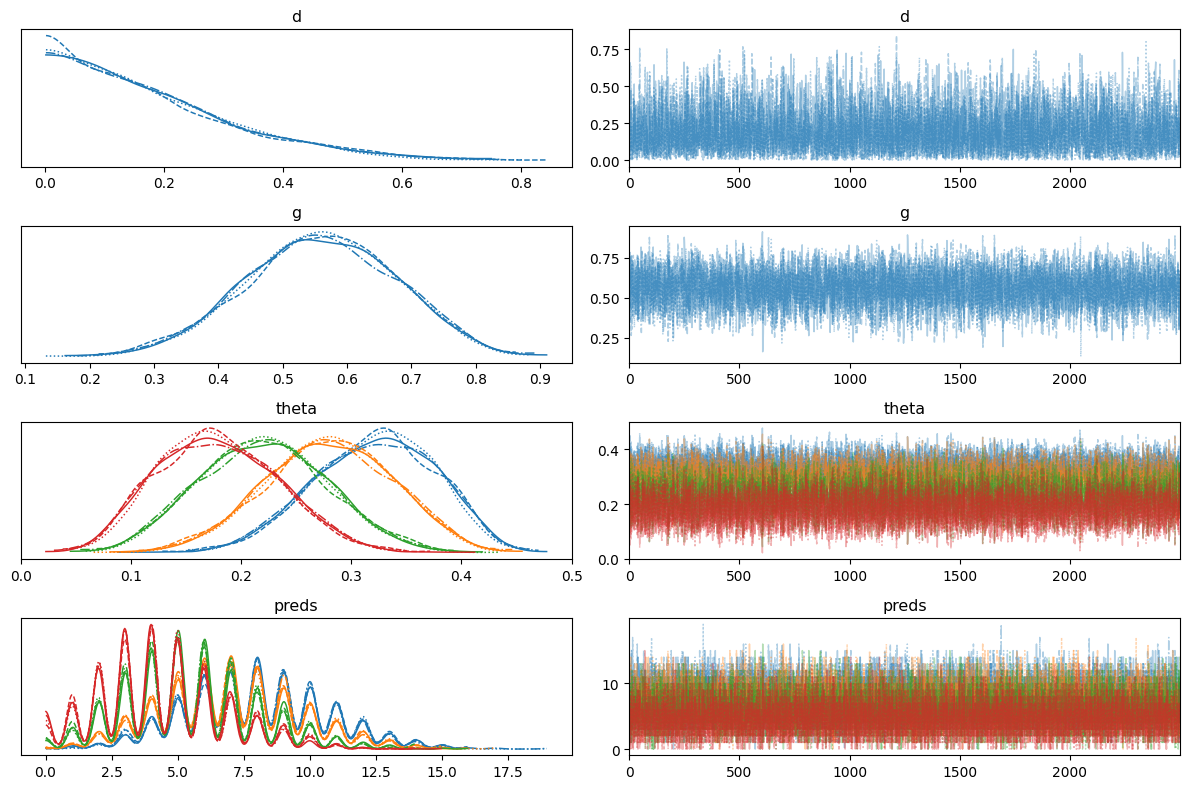

In [8]:
# Traceplots and marginals - visual convergence checks
axarr = az.plot_trace(fit)
plt.tight_layout()

In [ ]:
program_code = """
data {
    int<lower=1> N; // Number of trials
    int<lower=1> K; // Number of categories
    array[K] int<lower=0, upper=N> freqs; // Observed frequencies
}

parameters {
    real<lower = 0, upper=1> d;
    real<lower = 0, upper=1> g;
}

transformed parameters {
    simplex[K] theta; // Probability vector for the multinomial distribution
    theta[1] = 0.5  *(d + (1 - d) * g); // Old, Old
    theta[2] = 0.5 * ((1 - d) * g); // Old, New
    theta[3] = 0.5 * (d + (1 - d) * (1 - g)); // New, New
    theta[4] = 0.5 * ((1 - d) * (1 - g)); // New, Old
}

model {
    theta ~ dirichlet(rep_vector(1.0, K)); // Non-informative Dirichlet prior
    freqs ~ multinomial(theta); // Likelihood function
}

generated quantities {
    array[K] int preds = multinomial_rng(theta, N); // Simulated predictions
}

"""

In [10]:
y = [3,7,2,5]

stan_dict = {
    'freqs': y,
    'N': 25,
    'K': 4
}

# Compile model
posterior = stan.build(program_code, data=stan_dict, random_seed=42)


# Sample (i.e., inverse inference)
fit = posterior.sample(num_chains=4, num_samples=2500, num_warmup=1000)

Building...

In file included from /home/ethan/anaconda3/envs/cognitive/lib/python3.12/site-packages/httpstan/include/stan/math/prim/prob/std_normal_ccdf_log.hpp:5,
                 from /home/ethan/anaconda3/envs/cognitive/lib/python3.12/site-packages/httpstan/include/stan/math/prim/prob.hpp:331,
                 from /home/ethan/anaconda3/envs/cognitive/lib/python3.12/site-packages/httpstan/include/stan/math/prim.hpp:16,
                 from /home/ethan/anaconda3/envs/cognitive/lib/python3.12/site-packages/httpstan/include/stan/math/rev.hpp:16,
                 from /home/ethan/anaconda3/envs/cognitive/lib/python3.12/site-packages/httpstan/include/stan/math.hpp:19,
                 from /home/ethan/anaconda3/envs/cognitive/lib/python3.12/site-packages/httpstan/include/stan/model/model_header.hpp:4,
                 from /home/ethan/.cache/httpstan/4.13.0/models/ynbx4vcm/model_ynbx4vcm.cpp:2:
/home/ethan/anaconda3/envs/cognitive/lib/python3.12/site-packages/httpstan/include/stan/math/prim/prob/st


Building: 18.1s, done.Messages from stanc:
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
Sampling:   0%
Sampling:  25% (3500/14000)
Sampling:  50% (7000/14000)
Sampling:  75% (10500/14000)
Sampling: 100% (14000/14000)
Sampling: 100% (14000/14000), done.
Messages received during sampling:
  Gradient evaluation took 1.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.17 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.13 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.1 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6e-06 seconds
  

In [11]:
# Estimation summary, convergence, and efficiency diagnostics
az.summary(fit)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
d,0.099,0.085,0.000,0.257,0.001,0.001,5473.0,3856.0,1.0
g,0.581,0.115,0.362,0.787,0.002,0.001,5536.0,4763.0,1.0
theta[0],0.311,0.055,0.208,0.410,0.001,0.001,5701.0,4943.0,1.0
theta[1],0.262,0.058,0.155,0.368,0.001,0.001,6027.0,6107.0,1.0
theta[2],0.238,0.058,0.132,0.345,0.001,0.001,6027.0,6107.0,1.0
theta[3],0.189,0.055,0.090,0.292,0.001,0.001,5701.0,4943.0,1.0
preds[0],7.759,2.689,2.000,12.000,0.030,0.021,7978.0,9108.0,1.0
preds[1],6.561,2.646,2.000,11.000,0.029,0.021,8247.0,8769.0,1.0
preds[2],5.972,2.574,1.000,10.000,0.028,0.020,8285.0,9089.0,1.0
preds[3],4.708,2.378,1.000,9.000,0.026,0.018,8195.0,9014.0,1.0


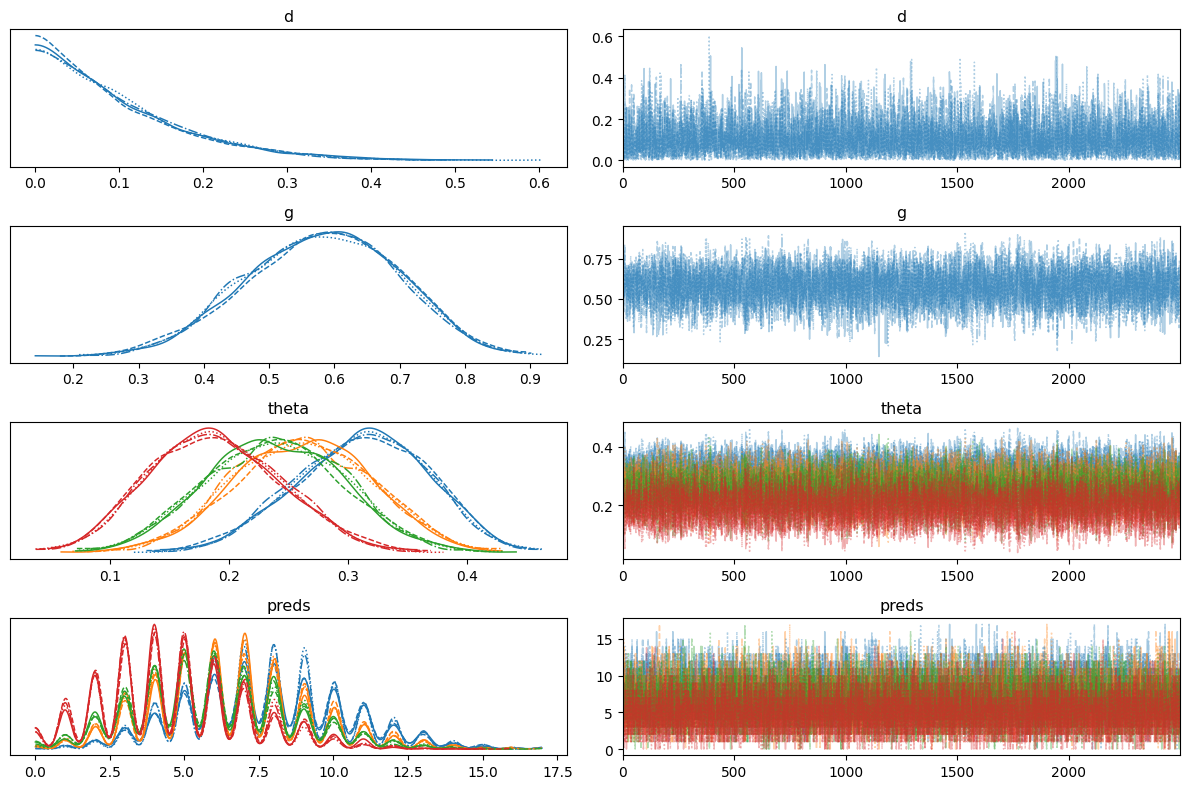

In [12]:
# Traceplots and marginals - visual convergence checks
axarr = az.plot_trace(fit)
plt.tight_layout()

1HT MPT Pred. "d" = 0.183
2HT MPT Pred. "d" = 0.099
1HT MPT Pred. "g" = 0.559
2HT MPT Pred. "g" = 0.581

We can see that there are slight differences between the d value between the two models. The 1HT MPT and 2HT model suggest that you are more likely to guess that the response was old and the word is old. For both models you have a 50/50 chance to guess that a word is in the old or new list.